In [1]:
%matplotlib notebook

In [2]:
import gym
import matplotlib.pyplot as plt
import numpy as np

from lab.agents import QLearningAgent
from lab.core import Experiment
from lab.utils.plotting import smooth

## Setting up the plot

<IPython.core.display.Javascript object>


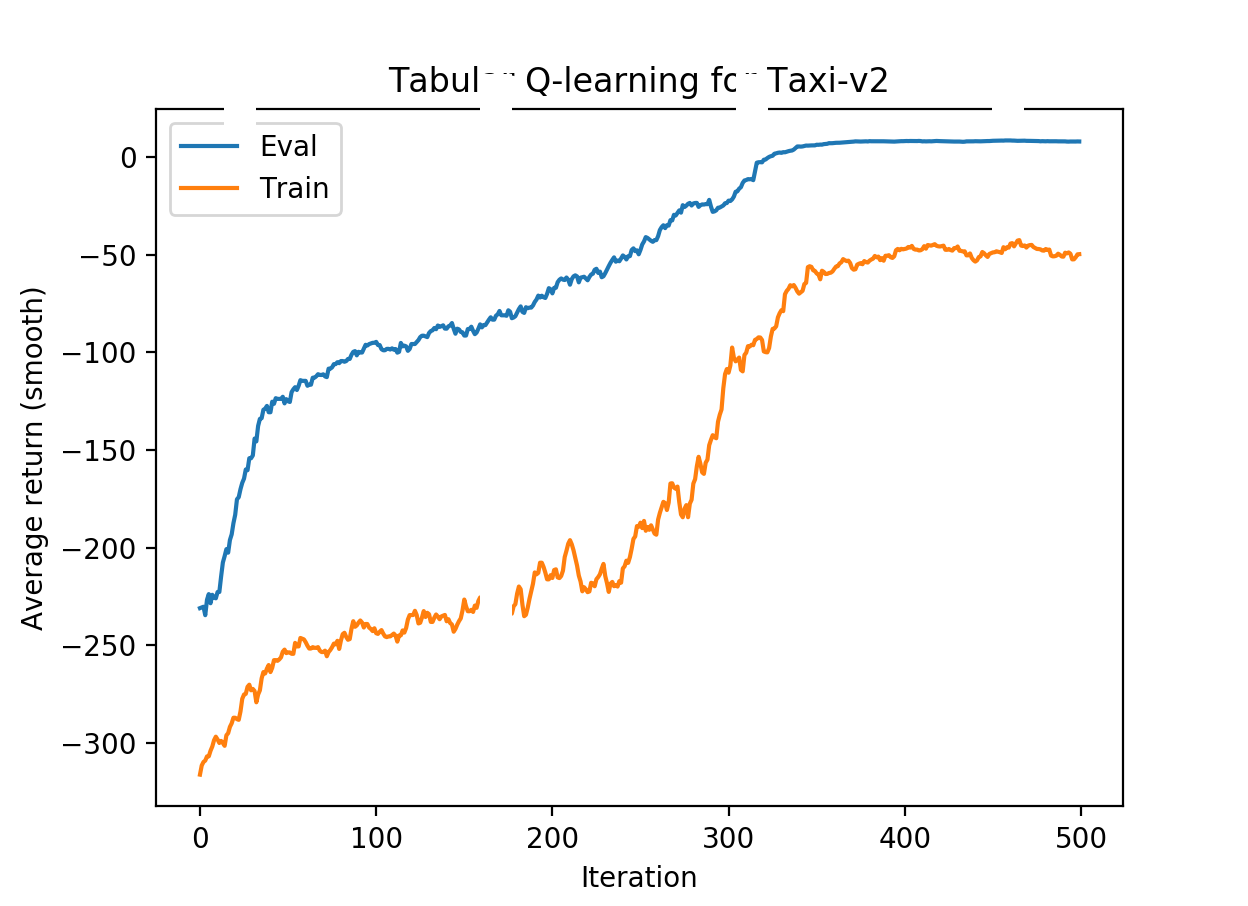

In [3]:
fig, ax = plt.subplots()

plt.plot([], label='Eval')
plt.plot([], label='Train')

plt.title('Tabular Q-learning for Taxi-v2')
plt.ylabel('Average return (smooth)')
plt.xlabel('Iteration')
plt.legend(loc='upper left')

plt.show()

In [4]:
WINDOW_SIZE = 25
def iteration_callback(experiment, statistics):
    eval_returns = smooth(statistics['eval_average_returns'], WINDOW_SIZE, method='mirror')
    train_returns = smooth(statistics['train_average_returns'], WINDOW_SIZE, method='mirror')

    ax.clear()
    plt.plot(eval_returns, label='Eval')
    plt.plot(train_returns, label='Train')

    plt.title('Tabular Q-learning for Taxi-v2')
    plt.ylabel('Average return (smooth)')
    plt.xlabel('Iteration')
    plt.legend(loc='upper left')
    # plt.ylim(0, 1)

    fig.canvas.draw()

## Running the experiment

In [5]:
env = gym.make('Taxi-v2')

In [6]:
agent = QLearningAgent(
    num_actions=env.action_space.n,
    num_states=env.observation_space.n,
    learning_rate=0.1,
    exploration_rate=0.5,
    discount_factor=0.99
)

In [7]:
experiment = Experiment(
    environment=env,
    agent=agent,
    num_iterations=500,
    train_steps=100,
    eval_steps=100,
    max_steps_per_episode=100,
    seed=0,
    iteration_callback=iteration_callback
)

In [8]:
stats = experiment.run()